#introduction to machine learning
##pca analysis on MNIST dataset

داخل درس با آنالیز مولفه های اصلی آشنا شده اید ، در این تمرین قصد داریم از ابتدا این روش را روی دیتاست داده شده عملی کنیم و نتیایج این روش را با همدیگر مشاهده کنیم.

In [23]:
first_name= "Hesam"
last_name= "Hosseini"
student_number= "400101034"

در بخش زیر تمامی کتابخانه هایی که لازم دارید را ایمپورت کنید.

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import random

### داده شده را لود کنید MNIST در این قسمت دیتا ست  

پیش از این که مولفه های اصلی داده ها را استخراج کنید آن را نرمالایز کنید.
توجه کنید که سمپل های لود شده به صورت 28*28  میباشند و باید آن را به صورت بردار 784 تایی تبدیل کنید

In [25]:
#load the data set and fill nan value with 0
# TODO (load dataset)
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [26]:
print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


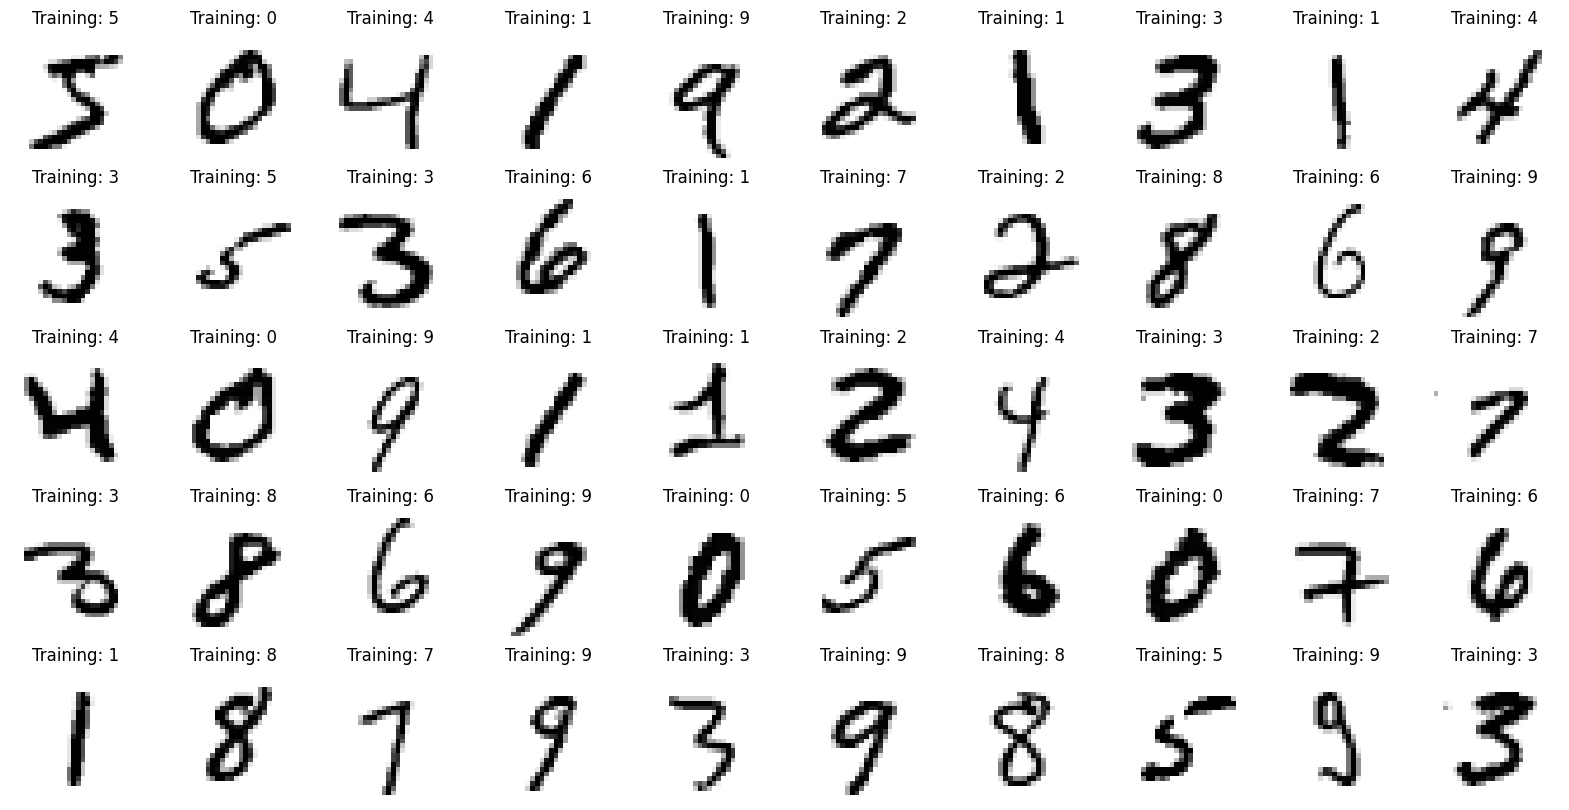

In [27]:
# here show 50 first of this images

def show_images(num_images,X,Y,clos=10):
    # TODO (implement show images function)
    #inputs dataset and number of images wants to show
    #output plot images

    #  clos = 10
     _, axes = plt.subplots(nrows=num_images//clos, ncols=clos, figsize=(20, 10))
     for ax, image, label in zip(axes.flatten(), X, Y):
       ax.set_axis_off()
       ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
       ax.set_title("Training: %i" % label)


show_images(50,x_train,y_train)

In [28]:
#TODO scale the data set to [0 1]
#divide data to maximum value .
x_train_scaled = (x_train/x_train.max())
x_test_scaled = (x_test/x_test.max())
print(np.max(x_train_scaled),np.max(x_test_scaled))

1.0 1.0


در این قسمت ابتدا تابع کواریانس داده را بدست آورید و سپس مقادیر ویژه و بردار ویژه های آن را استخراج کنید.

In [29]:
print(x_train_scaled.shape)
print(x_test_scaled.shape)

(60000, 28, 28)
(10000, 28, 28)


In [30]:
28*28

784

In [33]:
x_train_scaled_reshaped = x_train_scaled.reshape(x_train_scaled.shape[0],-1)
x_test_scaled_reshaped = x_test_scaled.reshape(x_test_scaled.shape[0],-1)
print(x_train_scaled_reshaped.shape)
print(x_test_scaled_reshaped.shape)

(60000, 784)
(10000, 784)


In [32]:
#TODO calculate the covariance matrix and the eigenvalue and eigenvectors of the covariance matrix.

cov_mat = np.cov(x_train_scaled_reshaped.T)

print(cov_mat.shape)
# calculate the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_mat)
# print("Covariance Matrix:\n", cov_mat)
# print("Eigenvalues:\n", eigenvalues)
# print("Eigenvectors:\n", eigenvectors)

(784, 784)


در بخش زیر میخواهیم تعدادی از مولفه های اصلی را استخراج کنیم که بخش قابل قبولی از واریانس داده ها را شامل شده باشند.

In [12]:
explained_variance = 0.7 # you can change this variable to get more component of datasets.
#calculate the total variance from eigenvalues and find the first k component that contains the eplained_variance of the total variance.
#TODO
total_variance = np.sum(eigenvalues)
explained_variance_ratio = np.cumsum(eigenvalues) / total_variance

k = 0

while explained_variance_ratio[k] < explained_variance:
    k += 1

print(f"The first {k+1} components contain at least {explained_variance*100}% of the explained variance.")

#calculate the compression_ratio

The first 26 components contain at least 70.0% of the explained variance.


حال در این بخش دیتاهای موجود را روی این مولفه ها تصویر کنید عملیات کاهش بعدد را انجام دهید و سپس ابعاد را به اندازه تصاویر اصلی برگردانید و  تصویر یکی از سمپل ها را برای هر دو حالت قبل از کاهش بعد روی مولفه ها و بعد از آن رسم کنید.

In [13]:
eigenvectors.shape

(784, 784)

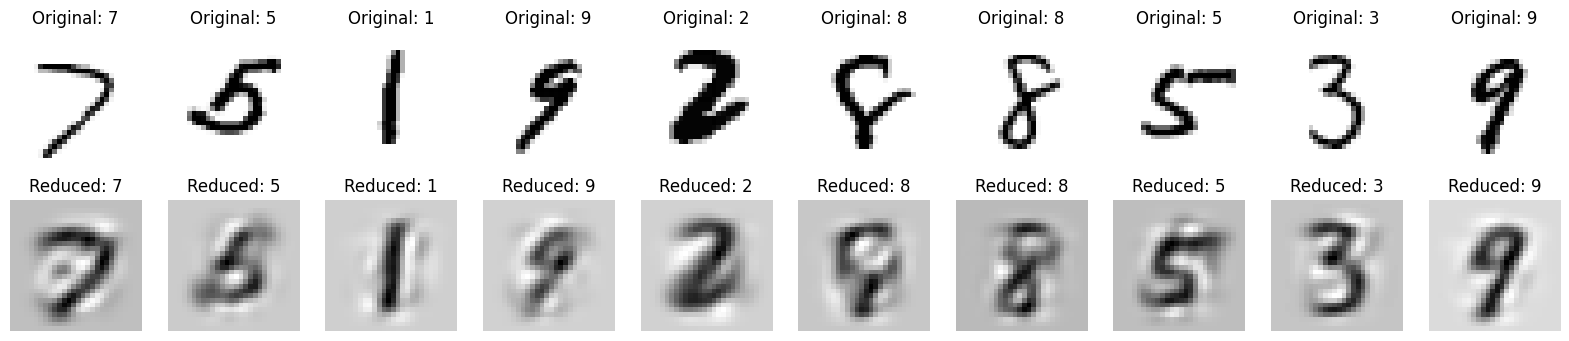

In [15]:
#Project Images into Reduced Dimensionality Eigenbasis F=X*V (X is our dataset,F our reduced dimensionality dataset,V is k choosen eigenvectors)
#And Reproject Images to Standard Basis for plotting the reduced component image X_k=F*V_transpose (V_transpose is equal to V inverse)
#select on sample and reshape it to a 28 by 28 matrix and plot them as image
top_vec = eigenvectors[:,:k]
F = np.dot(x_train_scaled_reshaped,(top_vec))
X_k = np.dot(F,(top_vec.T))



#TODO
#plot the dimentionally reduced data
#plot the original data
n = 10
sample_index = [random.randint(0, x_train.shape[0]) for _ in range(n)]
X_new = X_k[sample_index, :].reshape(n,28,28)
X = x_train[sample_index].reshape(n,28,28)
Y = y_train[sample_index]
_, axes = plt.subplots(nrows=2, ncols=n, figsize=(n*2, 4))
for i, image, label in zip(range(n), X, Y):
    axes[0,i].set_axis_off()
    axes[0,i].imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    axes[0,i].set_title("Original: %i" % label)
for i, image, label in zip(range(n), X_new, Y):
    axes[1,i].set_axis_off()
    axes[1,i].imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    axes[1,i].set_title("Reduced: %i" % label)


## Perform PCA and Gauge Max Accuracy

حال میخواهیم برای دیتای تصویر شده یک مدل یادگیری بسازیم و دقت مدل را برحسب تعدا مولفه های اصلی بدست بیاوریم .

In [37]:
#complete below function using python PCA function
def do_pca(n_components, data):
  #input number of component and not normalized data set.
  #output is the projected dataset
  # TODO
  data = data.reshape(data.shape[0],-1)
  scaler = StandardScaler()
  normalized_data = scaler.fit_transform(data)
  pca = PCA(n_components=n_components)
  reduced_data = pca.fit_transform(normalized_data)
  return reduced_data


In [40]:
data_reduced = do_pca(10,np.vstack((x_train,x_test)))
data_reduced.shape

(70000, 10)

In [51]:
#define a function that gets the X data and Y labels and returns the accuracy of ml model.

def ML_model(X_train , X_test , y_train , y_test, print_output=True):
    #define ML mod el inputs dataset and lables
    #output accuracy of model on dataset

    randomforest = RandomForestClassifier(n_estimators=23, random_state=30)
    randomforest.fit(X_train, y_train)
    y_pred = randomforest.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    if print_output:
      print(f' {acc*100:.3f}%')
    # TODO
    return acc

In [52]:
#your code to plot the accuracy of projected train data on one ml model(choose on your own reggression , random forest , ...)
#consider number of component from 2 to 101 and calculate accuracy based on number of components
#TODO
acc_list, pc_list = [], []
for pc in range(2,101):
    pc_list.append(pc)
    data_reduced = do_pca(pc,np.vstack((x_train,x_test)))
    spl = np.split(data_reduced, [x_train.shape[0]])
    x_train_reduced ,x_test_reduced =  spl[0] , spl[1]
    print(f'accuracy score with {pc} component is: ',end='')
    acc = ML_model(x_train_reduced,x_test_reduced,y_train,y_test)
    acc_list.append(acc)
    #TODO

accuracy score with 2 component is:  31.810%
accuracy score with 3 component is:  53.130%
accuracy score with 4 component is:  67.700%
accuracy score with 5 component is:  74.870%
accuracy score with 6 component is:  83.300%
accuracy score with 7 component is:  84.310%
accuracy score with 8 component is:  86.810%
accuracy score with 9 component is:  88.110%
accuracy score with 10 component is:  89.680%
accuracy score with 11 component is:  90.030%
accuracy score with 12 component is:  90.560%
accuracy score with 13 component is:  91.190%
accuracy score with 14 component is:  91.590%
accuracy score with 15 component is:  91.730%
accuracy score with 16 component is:  92.040%
accuracy score with 17 component is:  92.300%
accuracy score with 18 component is:  92.370%
accuracy score with 19 component is:  92.480%
accuracy score with 20 component is:  92.680%
accuracy score with 21 component is:  92.710%
accuracy score with 22 component is:  92.940%
accuracy score with 23 component is:  93.1

Text(0, 0.5, 'Accuracy')

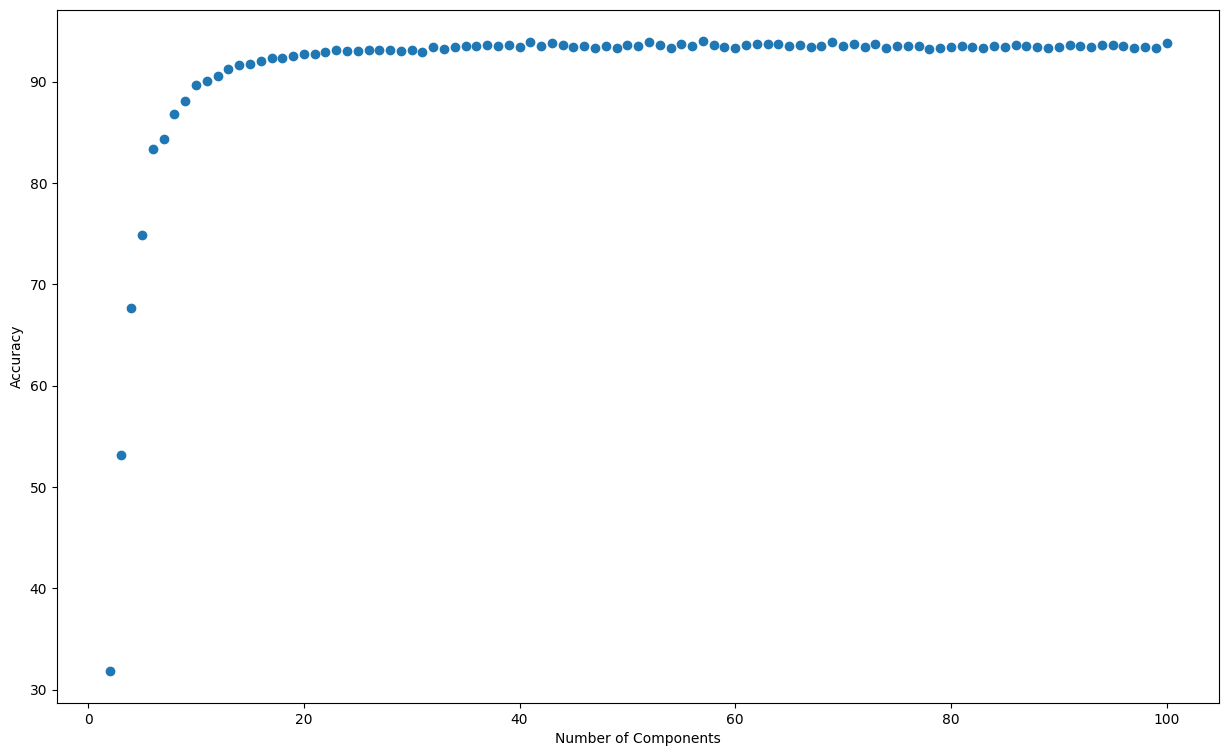

In [53]:
#plot the accuracy based on components.
#TODO

plt.figure(figsize=(15, 9))
plt.scatter(pc_list,[acc*100 for acc in acc_list])


plt.xlabel('Number of Components')
plt.ylabel('Accuracy')



In [56]:
#print the number of components that maximize the accuracy and the max accuracy
#TODO

max_acc = max(acc_list)
arg_max_acc = np.argmax(acc_list)
print(f'Number of components that maximize accuracy is {arg_max_acc+2}')
print(f'accuracy with {arg_max_acc+2} components : {max_acc}')



Number of components that maximize accuracy is 57
accuracy with 57 components : 0.9398
